## **Assignment 1 – ML Data Cleaning and Feature Selection** 

Abstract:
Using Spotify Data for predictive learning and to check the quality of the data to determine which features are important.

Submitted by Akhilesh Dongre.

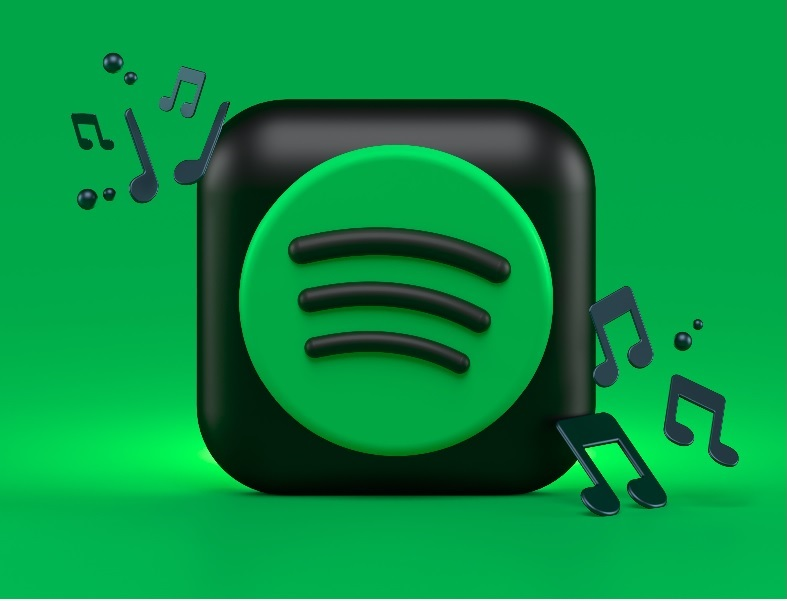

image link:https://images.unsplash.com/photo-1611339555312-e607c8352fd7?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2274&q=80



### Feature Explanations
Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .
duration_ms: The duration of the track in milliseconds.

key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

audio_mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.

audio_valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

song_popularity: Song ratings of spotify audience.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.




In [40]:

#Calculations, Data Management and Plotting
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import  train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier


## Loading Data

In [41]:
#loading dataset
data = pd.read_csv('Spotify_data.csv') #Read the dataset and store it in a data frame
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [42]:
data.shape

(18835, 15)

#### The Spotify dataset has 18835 rows and 15 columns

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


#### Column song_name is of type Object and rest of the columns are numeric (int64 or float64).
#### Columns - key, audio_mode, time_signature are categorical predictors as it takes on one of a limited, and usually fixed, number of possible values.



In [44]:
#Checking Nulls in the data set
data.columns[data.isnull().any()],data.isnull().sum()

(Index([], dtype='object'), song_name           0
 song_popularity     0
 song_duration_ms    0
 acousticness        0
 danceability        0
 energy              0
 instrumentalness    0
 key                 0
 liveness            0
 loudness            0
 audio_mode          0
 speechiness         0
 tempo               0
 time_signature      0
 audio_valence       0
 dtype: int64)

#### There is no missing data in any column in the dataset

In [45]:
#Converting to float 
data.song_duration_ms= data.song_duration_ms.astype(float)
data.time_signature= data.time_signature.astype(float)
data.audio_mode= data.audio_mode.astype(float)

In [46]:
data.describe()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


The ranges of all the variables make sense according to the definition of variables.

In [47]:
#Feature Engineering a column
data["popularity"]= [ 1 if i >=66.5 else 0 for i in data.song_popularity ]
data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [48]:
5449/(5449+13386)

0.2893018316963101

After cheching the song_popularity rating of songs that have been popular for the past 10 years in Spotify and took the mean value of them (66.5) . According to this value, the songs has above this rating could remain on the top lists for a long time. i.e. If song_popularity is higher than 66.5 (this is about 30% percent of data) I have labeled it "1" and if is not then labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

## Plotting density curves for numeric variables to identify likely distributions


x-axis : Variable


y-axis : Density (frequency with respect to the total dataset size)

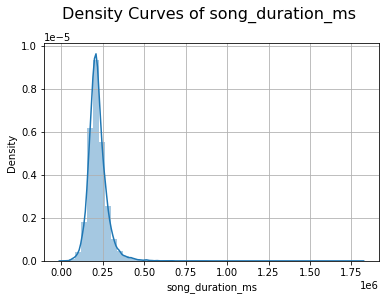

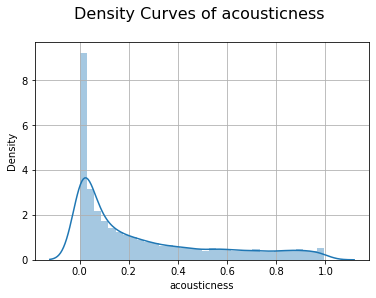

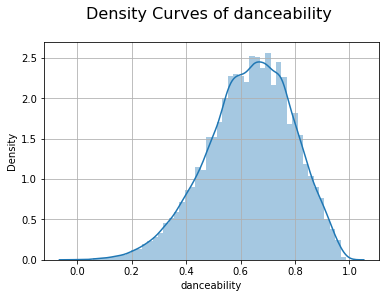

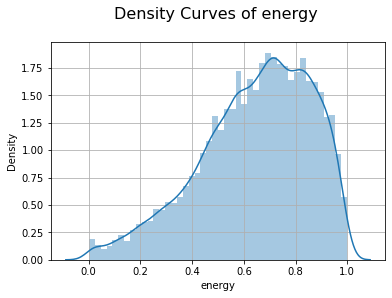

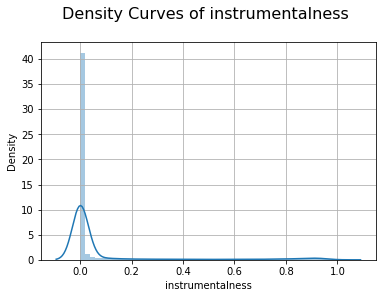

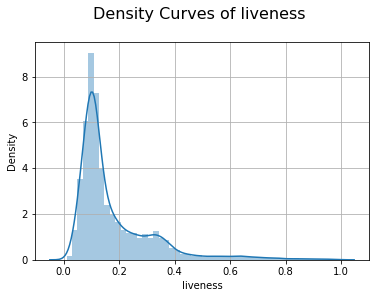

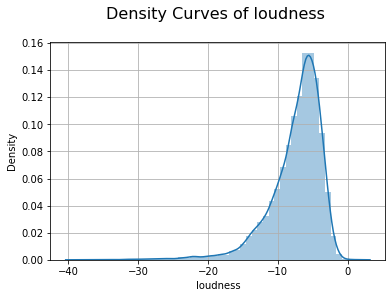

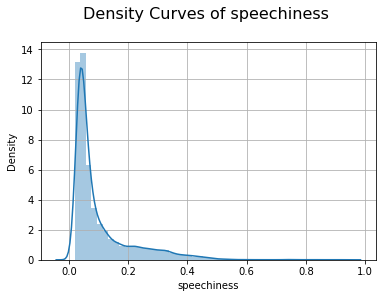

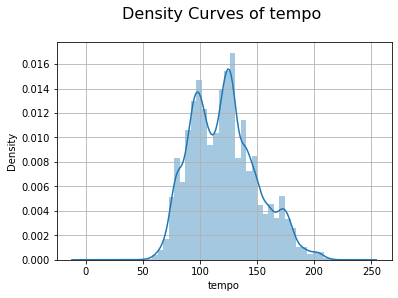

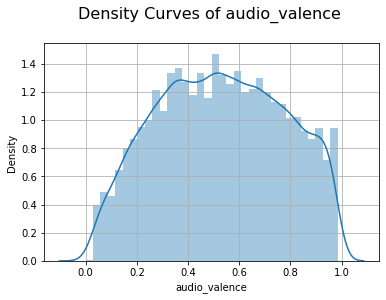

In [49]:
#checking the distribution of independent variables
import seaborn as sns
import matplotlib.pyplot as plt

def draw_distribution(df,feature):
    """
    density
    """
    
    sns.distplot(df[feature])
    plt.show()

feature_list = ['song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 
       'audio_valence']
for i in feature_list:
    plt.title("Density Curves of {} \n".format(i),fontsize=16)
    plt.grid(True)
    draw_distribution(data,i)
    plt.show()


#### These features are likely to be Right Skewed:
1. song_duration_ms
2. accousticness
3. instrumentalness
4. liveness
5. speechness

#### These features are likely to be left Skewed:
1. loudness

#### These features are are likely to be Bimodal Distributed:
1. tempo

#### These features are are likely to be Normally Distributed:
1. audio_valence
2. danceability
3. energy

## ANALYSING CATEGORICAL VARIABLES

In [50]:
#Function to print unique value counts for categorical variables.

def print_all_valuecounts(data):
    for col in ["key","audio_mode","time_signature"]:
        print(data[col].value_counts())
        print()
print_all_valuecounts(data)

0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64

1.0    11831
0.0     7004
Name: audio_mode, dtype: int64

4.0    17754
3.0      772
5.0      233
1.0       73
0.0        3
Name: time_signature, dtype: int64



The values in the Catergorical Fields are sparse.

In [51]:
def bar_plot(variable):
    
    var=data[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.ylabel(variable)
    plt.title("Histogram for "+variable)
    plt.show()
    # print("{}:\n{}".format(variable,var_value))


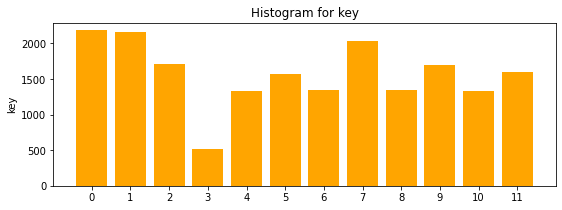

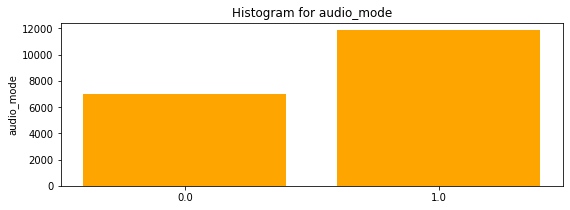

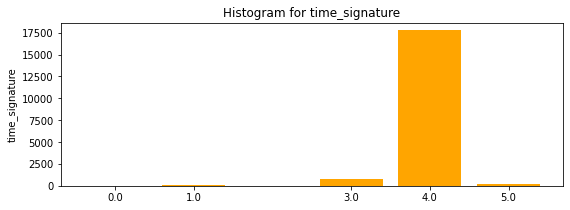

In [52]:
category1 = ["key","audio_mode","time_signature"]
for c in category1:
    bar_plot(c)

### OBSERVATION:
Looking at the plots we can say:
* frequency of Key 0 and key 1 are the highest.
* audio mode 1 has double the frequency of audio 0.[ More songs with Major cords are present in the dataset]
* time signature 4 dominates over the rest of the time signatures



In [53]:
# key vs popularity
data.groupby(["key","popularity"], as_index = False).count().sort_values(by=['popularity',"song_popularity"],ascending = False)[["key","popularity",'song_popularity']]

,key,popularity,song_popularity
3,1,1,771
1,0,1,663
15,7,1,491
11,5,1,473
23,11,1,470
5,2,1,456
13,6,1,435
19,9,1,431
17,8,1,394
9,4,1,378


Key 1,0 have a higher song popularity.
Whether as Key 7 also has low song popularity.

Also the number of songs in key 0,1 and 7 are highest hence the dataset showing some bias in the distribution

In [54]:
# audio_mode vs popularity
data.groupby(["audio_mode","popularity"], as_index = False).count().sort_values(by="song_popularity",ascending = False)[["audio_mode","popularity",'song_popularity']]

,audio_mode,popularity,song_popularity
2,1.0,0,8459
0,0.0,0,4927
3,1.0,1,3372
1,0.0,1,2077


Audio mode 1 is more popular than audio mode 0.

In [55]:
# time_signature vs popularity
data.groupby(["time_signature",'popularity'], as_index = False).count().sort_values(by="song_popularity",ascending = False)[["time_signature","popularity",'song_popularity']]

,time_signature,popularity,song_popularity
5,4.0,0,12561
6,4.0,1,5193
3,3.0,0,600
4,3.0,1,172
7,5.0,0,162
8,5.0,1,71
1,1.0,0,60
2,1.0,1,13
0,0.0,0,3


time signature 4 has the most number of popular songs.

In [56]:
#dummifying categorical variables
# DATA PREP
df = pd.get_dummies(data, columns=["key","audio_mode","time_signature"])
df.drop(columns={'song_popularity','song_name'}, inplace = True)

## Independent Variables which are useful for prediction of target Variable (popularity)

### Method 1: Using Correlation Matrix

In [57]:
data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.699048
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.003494
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.106483
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.107519
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.040548
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.160144
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.030251
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.023265
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137111
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.012290


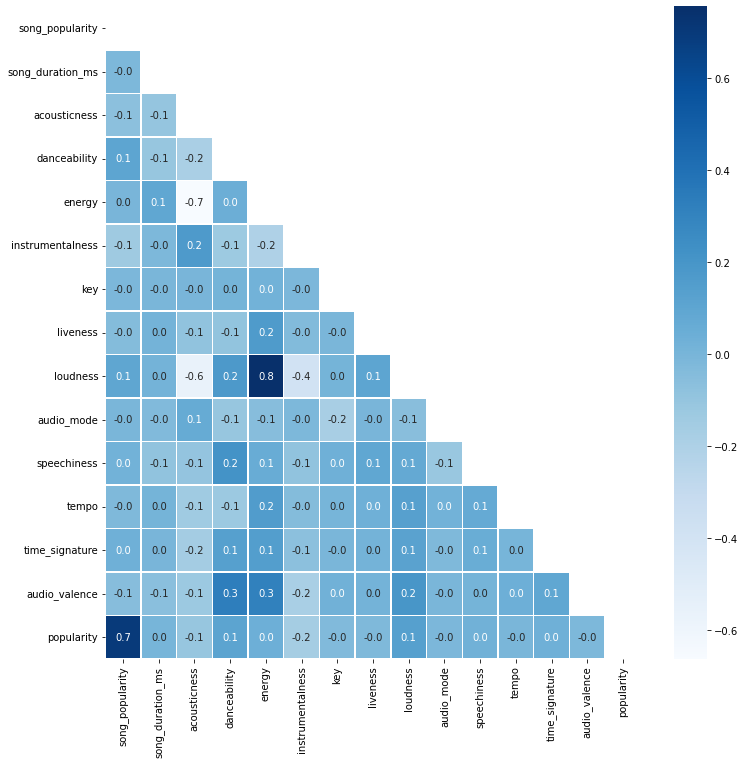

In [58]:
#correlation of predictors
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data.corr().corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

### OBSERVATION:
Correlation between loudness and energy is 0.8 which is strong and correlation between loudness and accusticness is 0.6 which is moderate. Except two of them all the correlations are quite low. When we compare the correlation between song_popularity and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. Danceability and loudness seems to have correlation with popularity feature(0.10) and accousticness has -0.10 and instrumentalness has -0.20. Hence, I can keep all the predictors. (Song popularity will be removed before predictive analysis.)


#### The dependence of the predictors with each other can be observed looking at the correlation matrix and are as follows :
1) loudness and energy (directly related). 


2) audio valence to energy and danceability (directly related).


3) energy and acousticness (inversely related).


4) load and accousticness (inversely related).

### Method 2 : Using Logistic Regression

In [59]:
import statsmodels.formula.api as statsmodel
var = statsmodel.logit(formula="popularity ~ song_duration_ms +acousticness + danceability + energy + instrumentalness + C(key) + liveness + loudness + C(audio_mode) + speechiness + tempo + C(time_signature) + audio_valence", data=data).fit()
var.summary()

         Current function value: 0.567025
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                18835
Model:                          Logit   Df Residuals:                    18808
Method:                           MLE   Df Model:                           26
Date:                Sun, 09 Oct 2022   Pseudo R-squ.:                 0.05735
Time:                        23:54:18   Log-Likelihood:                -10680.
converged:                      False   LL-Null:                       -11330.
Covariance Type:            nonrobust   LLR p-value:                7.452e-258
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -15.5376   3992.379     -0.004      0.997   -7840.457    7809.382
C(key)[T.1]                  0.0714      0.067      1.058      0.290      -0.061       0.204
C(key)[T.2]                 -0.1953      0.074     -2.638      0.008      -0.340      -0.050
C(key)[T.3]                 -0.2802      0.121     -2.325      0.020      -0.516      -0.044
C(key)[T.4]                 -0.0583      0.080     -0.728      0.466      -0.215       0.099
C(key)[T.5]                 -0.0337      0.075     -0.449      0.653      -0.181       0.113
C(key)[T.6]                  0.0137      0.078      0.176      0.861      -0.139       0.166
C(key)[T.7]                 -0.3397      0.072     -4.734      0.000      -0.480      -0.199
C(key)[T.8]                 -0.1583      0.079     -2.014      0.044      -0.312      -0.004
C(key)[T.9]                 -0.2509      0.075     -3.338      0.001      -0.398      -0.104
C(key)[T.10]                -0.1196      0.080     -1.488      0.137      -0.277       0.038
C(key)[T.11]                -0.1333      0.075     -1.768      0.077      -0.281       0.014
C(audio_mode)[T.1.0]         0.0175      0.036      0.483      0.629      -0.054       0.089
C(time_signature)[T.1.0]    16.2188   3992.379      0.004      0.997   -7808.701    7841.139
C(time_signature)[T.3.0]    16.3969   3992.379      0.004      0.997   -7808.523    7841.317
C(time_signature)[T.4.0]    16.3983   3992.379      0.004      0.997   -7808.522    7841.318
C(time_signature)[T.5.0]    16.6129   3992.379      0.004      0.997   -7808.307    7841.533
song_duration_ms          5.764e-07   3.05e-07      1.892      0.058   -2.07e-08    1.17e-06
acousticness                -0.7657      0.085     -9.040      0.000      -0.932      -0.600
danceability                 1.1801      0.131      8.980      0.000       0.923       1.438
energy                      -1.5596      0.156    -10.007      0.000      -1.865      -1.254
instrumentalness            -2.2453      0.141    -15.876      0.000      -2.522      -1.968
liveness                    -0.2886      0.121     -2.379      0.017      -0.526      -0.051
loudness                     0.1138      0.009     13.217      0.000       0.097       0.131
speechiness                 -0.3308      0.171     -1.937      0.053      -0.665       0.004
tempo                       -0.0004      0.001     -0.662      0.508      -0.002       0.001
audio_valence               -0.5553      0.081     -6.856      0.000      -0.714      -0.397
============================================================================================
"""

### OBSERVATION:
Looking at the p-value from the summary to check the influence of independent variable on target variable. 

In this dataset Popularity is the target value using Logistic Regression.
Logistic regression is the type of regression analysis used to find the probability of a certain event occurring.
According to Logistic regression summary:

*Significant variables (p-value < 0.05):*

* C(key)[T.2]
* C(key)[T.3]
* C(key)[T.7]
* C(key)[T.8]
* C(key)[T.9]
* acousticness
* danceability
* energy
* instrumentalness
* liveness
* loudness
* audio_valence

The rest of the precitors are not signifacant. Will be keeping them in the dataset for analysis purposes.


### Method 3 : VIF (variance_inflation_factor)
In VIF method, we pick each feature and regress it against all of the other features. To find their effect amongs each other.

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = data.drop(columns={"key","audio_mode","time_signature",'song_popularity','song_name'})
# df_vif.drop(columns={'song_popularity','song_name'}, inplace = True)

X = df_vif.loc[:,df_vif.columns != 'popularity']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature        VIF
0  song_duration_ms  13.575195
1      acousticness   2.905786
2      danceability  15.202038
3            energy  19.618620
4  instrumentalness   1.380827
5          liveness   2.670678
6          loudness   8.927089
7       speechiness   2.133059
8             tempo  16.379998
9     audio_valence   7.584064


### OBSERVATION

A rule of thumb while interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

So, For the numerical variables 
1) loudness, danceability,song duration and energy are highly correlated, followed by loudness and audio valence.

2) Speechiness, instrumentalness, accousticness and liveness are moderately correlated to any other feature.

# Building the Model
  Preparing Data Set

In [61]:
x,y = df.loc[:,df.columns != 'popularity'], df.loc[:,'popularity']


X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.2, random_state=234)

X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.2, random_state=12)


## Plotting the train and test data sets to see if their distribution is similar
We can infer after looking at the dataset that their distribution of predictors is similar.

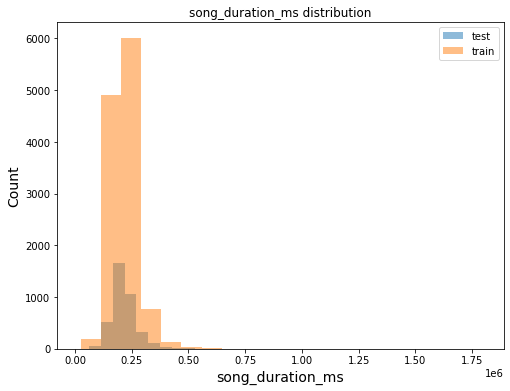

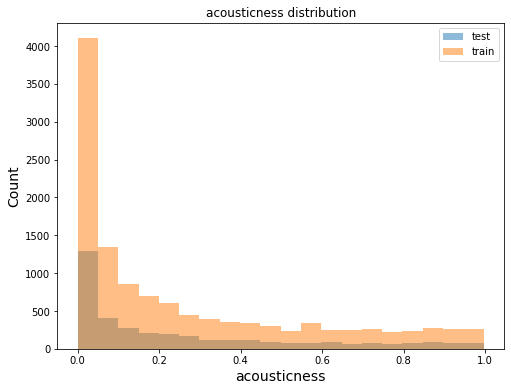

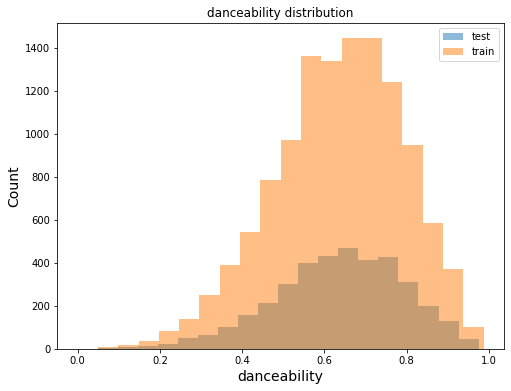

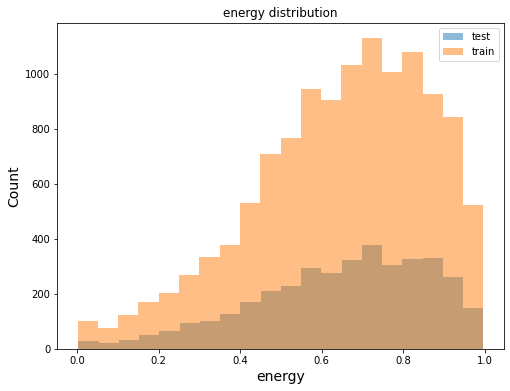

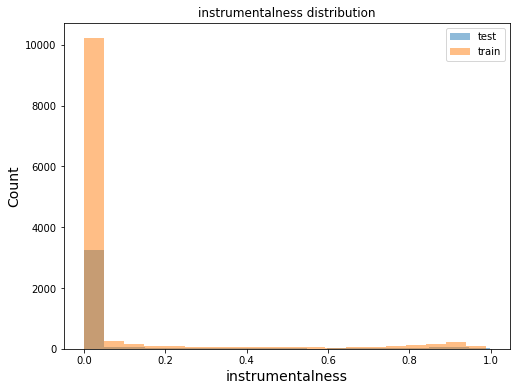

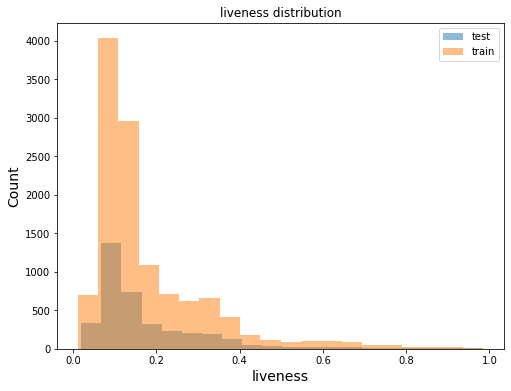

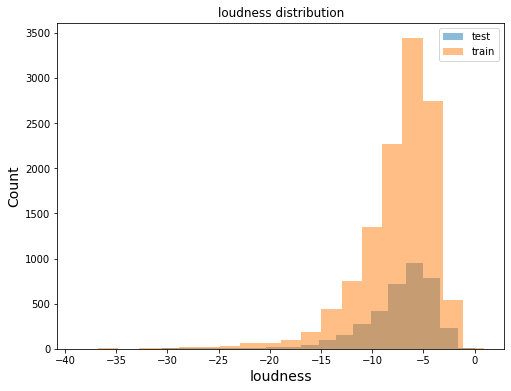

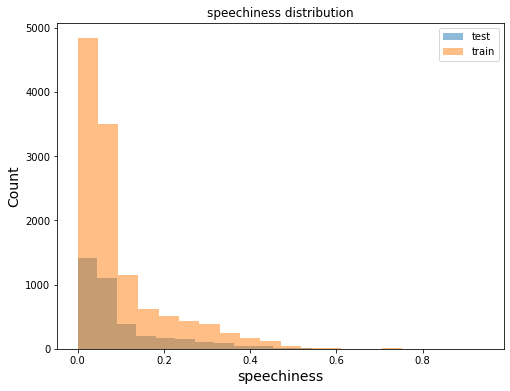

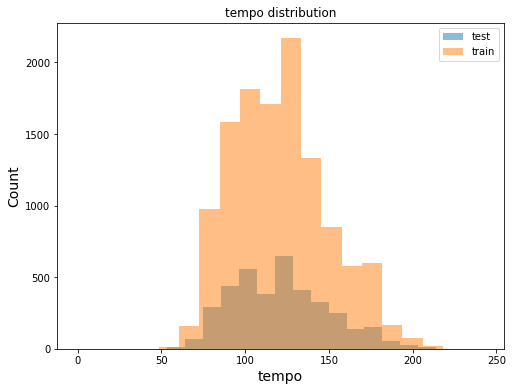

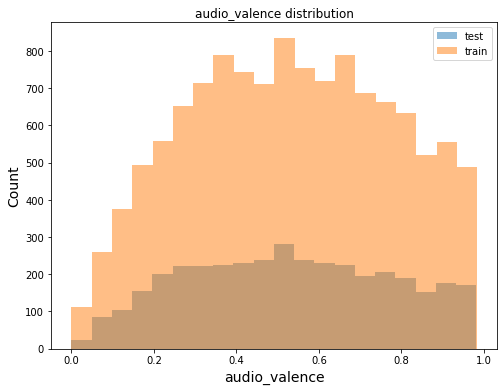

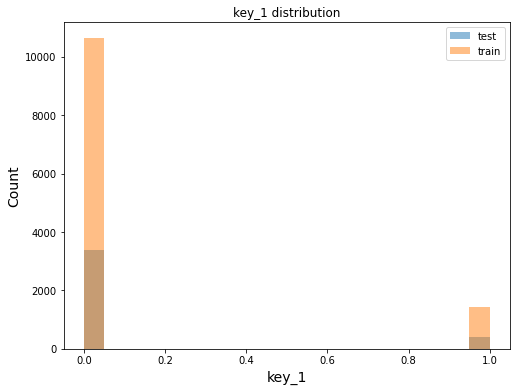

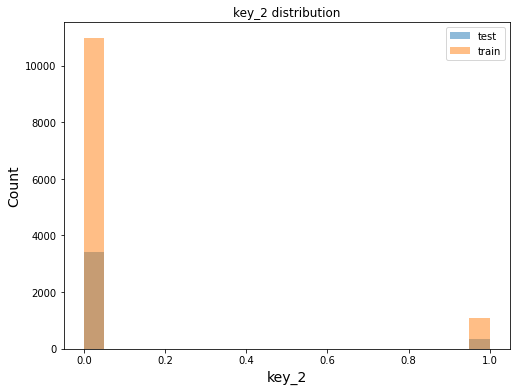

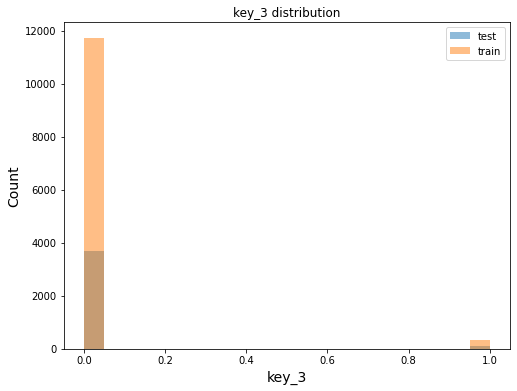

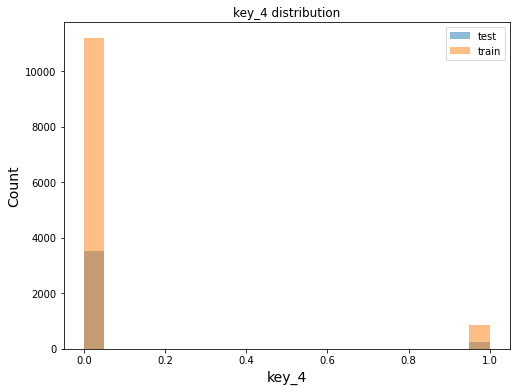

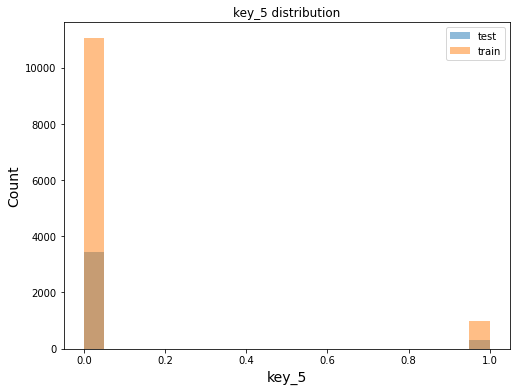

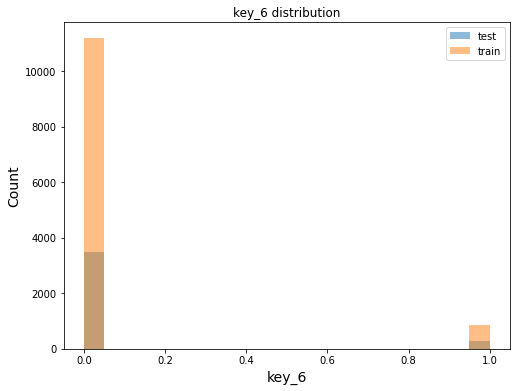

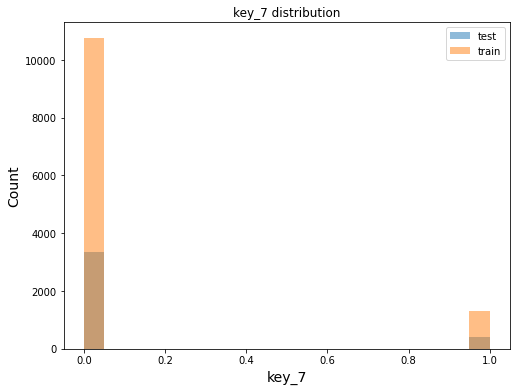

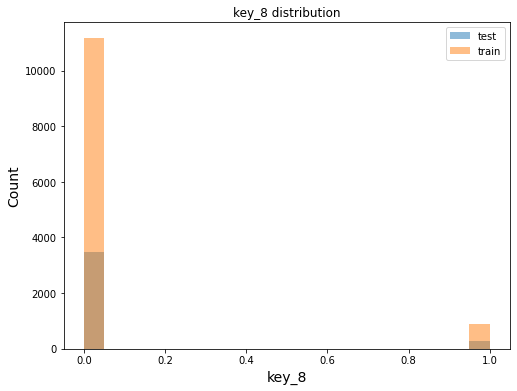

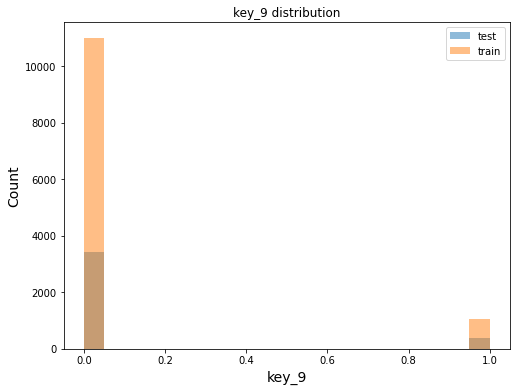

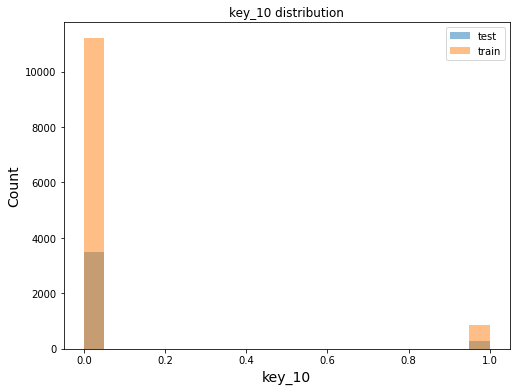

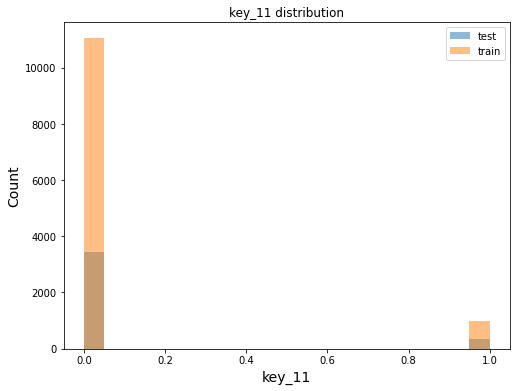

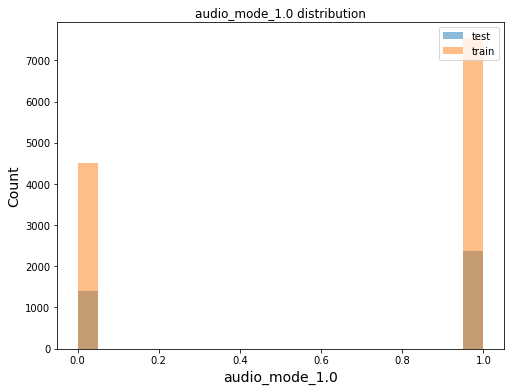

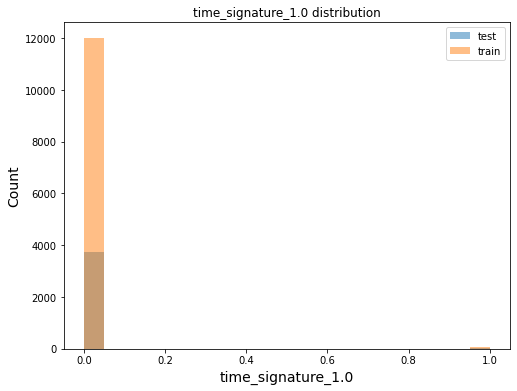

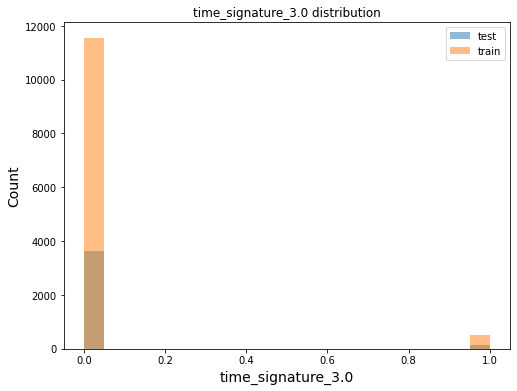

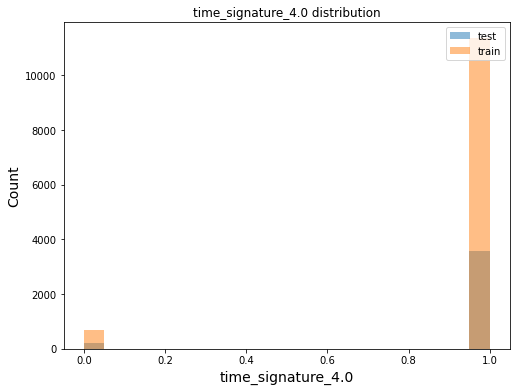

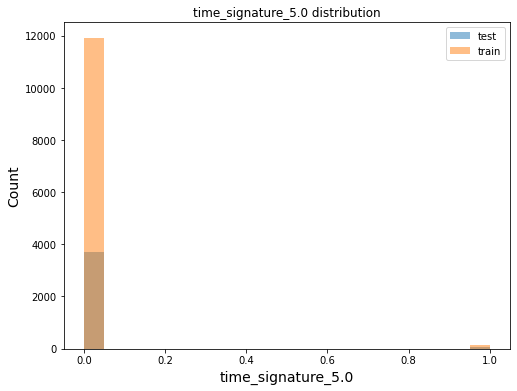

In [62]:
X_test_plot = X_test[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'audio_mode_1.0', 'time_signature_1.0', 'time_signature_3.0',
       'time_signature_4.0', 'time_signature_5.0']]


X_train_plot = X_train[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'audio_mode_1.0', 'time_signature_1.0', 'time_signature_3.0',
       'time_signature_4.0', 'time_signature_5.0']]

# X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.15, random_state=1)

# Plotting the data to see the histogram of train and text data 
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error 



# Create logistic regression object
regr = LogisticRegression()

model_lor = regr.fit(X_train, y_train)
prediction = model_lor.predict(X_test)

# Train the model using the training sets
regr.fit(X_train,y_train)

#accuracy
print("training data score: {:,.3f}".format(regr.score(X_train, y_train)))
print("test data score: {:,.3f}".format(regr.score(X_test, y_test)))

# Make predictions using the training set
y_pred = regr.predict(X_test)
y_pred_val=regr.predict(X_t)

cm = confusion_matrix(y_test,y_pred)



print(cm)
## Accuracy
print("ACCURACY",accuracy_score(y_test,y_pred))
## Precision
print("PRECISION",precision_score(y_test,y_pred))
## Recall
print("Recall", recall_score(y_test,y_pred))
## F1 Score
print("F1 Score", f1_score(y_test,y_pred))



training data score: 0.715
test data score: 0.697
[[2627    0]
 [1140    0]]
ACCURACY 0.6973719139899124
PRECISION 0.0
Recall 0.0
F1 Score 0.0


Looking at the prediction results after Logistic Regression where the accuracy is roughly 70% we can say this is not the most optimal method to classify the popularity of the songs. As the target variable is in the ratio of 70:30 (0:1).


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 4)
rf.fit(X_train,y_train)

print("Train accuracy of random forest",rf.score(X_train,y_train))
print("Test accuracy of random forest",rf.score(X_test,y_test))

RandomForestClassifier_score=rf.score(X_test,y_test)
y_pred=rf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

print(cm)
## Accuracy
print("ACCURACY",accuracy_score(y_test,y_pred))
## Precision
print("PRECISION",precision_score(y_test,y_pred))
## Recall
print("Recall", recall_score(y_test,y_pred))
## F1 Score
print("F1 Score", f1_score(y_test,y_pred))

Train ccuracy of random forest 0.9969304795088767
Test accuracy of random forest 0.865941067162198
[[2558   69]
 [ 436  704]]
ACCURACY 0.865941067162198
PRECISION 0.9107373868046572
Recall 0.6175438596491228
F1 Score 0.7360167276529013


Accuracy using RandomForestClassifier has gone up to nearly 86% . As F1 score is 73% this is a decent model. with some false positives and negatives. As the reults have improved with respect to Logistic Regression. I will be using RandomForestClassifier in the subsequent modeling tasks.
Overfitting is also noticed looking at the train accuracy of the model.

In [65]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from mlxtend.evaluate import bias_variance_decomp
loss, bias, var = bias_variance_decomp(rf, X_train.values, y_train.values, X_test.values, y_test.values, loss='0-1_loss', num_rounds=250, random_seed=1)
# summarize results
print('loss: %.3f' % loss)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

loss: 0.169
Bias: 0.133
Variance: 0.051


The loss is calculated using 0-1 Loss function for a classification problem.
The simplest loss function is the zero-one loss. It literally counts how many mistakes an hypothesis function h makes on the training set. For every single example it suffers a loss of 1 if it is mispredicted, and 0 otherwise.
The results imply that:

* 17% of predictions are not accurately predicted.
* Bias of 0.133 suggests that Bias is high. i.e. High Bias exists between the statistic's expected value and the true value of the popularity variable.
* Variance is low. i.e a measure of dispersion that takes into account the spread of all data points in a data set is low.


## OUTLIERS DETECTION, REMOVAL AND MODEL RESULTS FOR DATASET AFTER REMOVING OUTLIERS


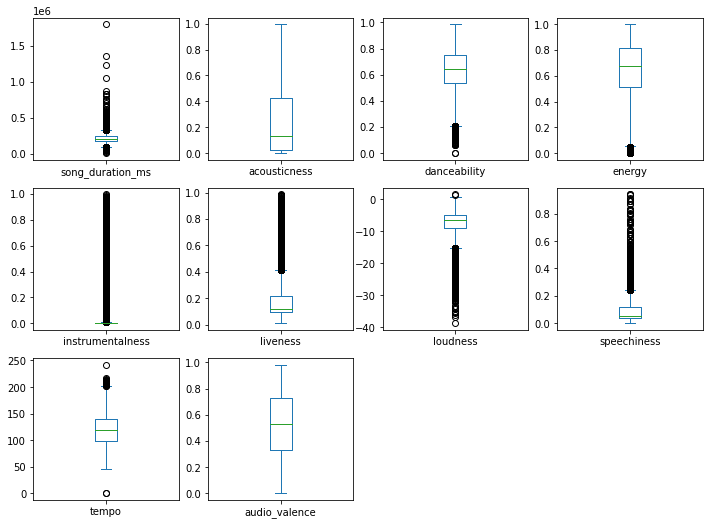

In [67]:
#Check the box plot by normalizing all the predictors except categorical variables
df[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence']].plot(kind='box', figsize=(12,12), layout=(4,4),sharex=False, subplots=True);
df_OL=df.copy()

In this Dataset song_duration_ms, danceability, energy,instrumentalness, liveness, loudness, speechiness, tempo have outliers

Choosing Dancebility for outlier treatment as it does affect popularity of the songs. If people can dance on it they tend to like it.



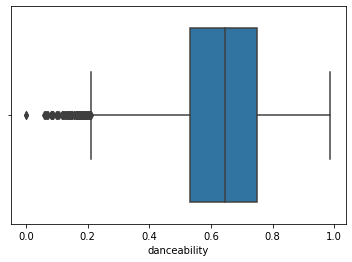

In [68]:
#BoxPlot before removal
sns.boxplot(df_OL['danceability'])

Shape Before removing Outliers:  (18835, 30) IQR:  0.21500000000000008
After Removal of outliers:  (18702, 30)


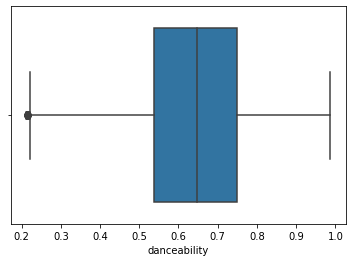

In [69]:
#IQR-Inter Quartile Range
Q1 = np.percentile(df_OL['danceability'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(df_OL['danceability'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Shape Before removing Outliers: ", df_OL.shape,"IQR: ", IQR)

#upper bound
upper = np.where(df_OL['danceability'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_OL['danceability'] <= (Q1-1.5*IQR))

#Removing Outliers from CCAvg
df_OL.drop(upper[0], inplace = True)
df_OL.drop(lower[0], inplace = True)
 
print("After Removal of outliers: ", df_OL.shape)

#BoxPlot after removal
sns.boxplot(df_OL['danceability'])


As we can see the outliers for Danceabilty have been removed.

In [70]:
#TRAINING MODEL WITH OUTLIERS REMOVED FOR DANCEABILITY
x,y = df_OL.loc[:,df_OL.columns != 'popularity'], df_OL.loc[:,'popularity']
X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.4, random_state=234)

X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.2, random_state=12)

rf=RandomForestClassifier(n_estimators=150,random_state = 4)
rf.fit(X_train,y_train)
print("Train ccuracy of random forest",rf.score(X_train,y_train))
print("Test accuracy of random forest",rf.score(X_test,y_test))
RandomForestClassifier_score=rf.score(X_test,y_test)
y_pred=rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print("CONFUSION MATRIX",cm)
## Accuracy
print("ACCURACY",accuracy_score(y_test,y_pred))
## Precision
print("PRECISION",precision_score(y_test,y_pred))
## Recall
print("Recall", recall_score(y_test,y_pred))
## F1 Score
print("F1 Score", f1_score(y_test,y_pred))



Train ccuracy of random forest 0.9971033868092691
Test accuracy of random forest 0.8555006015238604
CONFUSION MATRIX [[5186  141]
 [ 940 1214]]
ACCURACY 0.8555006015238604
PRECISION 0.8959409594095941
Recall 0.5636025998142989
F1 Score 0.6919350242234255


Accuracy is still in the same range. As F1 score has decreased to 69% and Precision has also gone down.Removing outliers has caused removal of some important feature data points which were helping the model to predict the popularity better.

In [71]:
loss, bias, var = bias_variance_decomp(rf, X_train.values, y_train.values, X_test.values, y_test.values, loss='0-1_loss', num_rounds=250, random_seed=1)
# summarize results
print('loss: %.3f' % loss)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

loss: 0.176
Bias: 0.143
Variance: 0.052


As the above results imply:

* 17.6% of predictions are not accurately predicted (more than the model with outliers).
* Bias of 0.143 suggests that Bias is high.
* Variance is low.





## IMPUTATION After randomly removing 1%, 5% and 10% of data
Methods of imputation on the dataset used are:
  
 * Median
  
 * Mean
  
 * Dropping

In [81]:
df_1 = df.copy()

#removing 1% data from column 
df_percent=df_1['energy'].sample(frac = 0.01)

#using location of fraction data to set null
df_1['energy'].loc[df_1.index.isin(df_percent.index)]=np.NaN

#Count of null values in Income row 
df_1['energy'].isnull().sum()


188

Using median imputtation method to replace null values

In [82]:
df_1['energy']=df_1['energy'].fillna(df_1['energy'].median())

In [83]:
df_5 = df.copy()

#removing 5% data from column 
df_percent=df_5['energy'].sample(frac = 0.05)

#using location of fraction data to set null
df_5['energy'].loc[df_5.index.isin(df_percent.index)]=np.NaN

#Count of null values in Income row 
df_5['energy'].isnull().sum()


942

Using mean imputtation method to replace null values

In [84]:
df_5['energy']=df_5['energy'].fillna(df_5['energy'].mean())

In [85]:
#Removing 10% data
df_10 = df.copy()

#removing 10% data from column 
df_percent10=df_10['energy'].sample(frac = 0.1)

#using location of fraction data to set null
df_10['energy'].loc[df_10.index.isin(df_percent10.index)]=np.NaN

#number of nulls 
df_10['energy'].isnull().sum()

1884

Using mode imputtation method to replace null values

In [86]:

df_10=df_10.dropna(subset=['energy'])
df_10

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_9,key_10,key_11,audio_mode_0.0,audio_mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474,...,0,0,0,0,1,0,0,0,1,0
2,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324,...,0,0,0,0,1,0,0,0,1,0
3,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198,...,0,0,0,0,1,0,0,0,1,0
4,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574,...,0,1,0,0,1,0,0,0,1,0
5,235893.0,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0.1240,189.931,0.320,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18828,216173.0,0.862000,0.515,0.286,0.000069,0.1060,-11.776,0.0378,115.076,0.284,...,0,0,0,0,1,0,0,0,1,0
18829,195106.0,0.395000,0.644,0.523,0.000000,0.0930,-7.660,0.0378,95.966,0.445,...,0,0,0,0,1,0,0,0,1,0
18832,182211.0,0.847000,0.719,0.325,0.000000,0.1250,-12.222,0.0355,130.534,0.286,...,0,0,0,0,1,0,0,0,1,0
18833,352280.0,0.945000,0.488,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,...,0,0,0,0,1,0,0,0,1,0


df_1 is the dataset with 1% data imputation

df_5 is the dataset with 5% data imputation

df_10 is the dataset with 10% data imputation

Looping through the Imputed Datasets and Getting Modelling Results


In [87]:
# Running Random Forest Classifier on 3 imputed datasets


for i in ["df_1","df_5","df_10"]:
  
  df_imp=pd.DataFrame(eval(i))
  print(i)
 

  x,y = df_imp.loc[:,df_imp.columns != 'popularity'], df_imp.loc[:,'popularity']
  

  X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.2, random_state=234)

  X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.2, random_state=12)

  rf=RandomForestClassifier(n_estimators=150,random_state = 4)
  rf.fit(X_train,y_train)
  print("Train accuracy of random forest",rf.score(X_train,y_train))
  print("Test accuracy of random forest",rf.score(X_test,y_test))
  RandomForestClassifier_score=rf.score(X_test,y_test)
  y_pred=rf.predict(X_test)
  cm = confusion_matrix(y_test,y_pred)

  loss, bias, var = bias_variance_decomp(rf, X_train.values, y_train.values, X_test.values, y_test.values, loss='0-1_loss', num_rounds=250, random_seed=1)
  # summarize results
 

  print(cm)
  ## Accuracy
  print("ACCURACY",accuracy_score(y_test,y_pred))
  ## Precision
  print("PRECISION",precision_score(y_test,y_pred))
  ## Recall
  print("Recall", recall_score(y_test,y_pred))
  ## F1 Score
  print("F1 Score", f1_score(y_test,y_pred))

  print('loss: %.3f' % loss)
  print('Bias: %.3f' % bias)
  print('Variance: %.3f' % var,"\n")


df_1
Train ccuracy of random forest 0.9969304795088767
Test accuracy of random forest 0.8635518980621184
[[2550   77]
 [ 437  703]]
ACCURACY 0.8635518980621184
PRECISION 0.9012820512820513
Recall 0.6166666666666667
F1 Score 0.7322916666666667
loss: 0.169
Bias: 0.134
Variance: 0.051 

df_5
Train ccuracy of random forest 0.9970134395221503
Test accuracy of random forest 0.8646137509954871
[[2558   69]
 [ 441  699]]
ACCURACY 0.8646137509954871
PRECISION 0.91015625
Recall 0.6131578947368421
F1 Score 0.7327044025157232
loss: 0.170
Bias: 0.135
Variance: 0.051 

df_10
Train ccuracy of random forest 0.9966814159292036
Test accuracy of random forest 0.8599233264523739
[[2324   53]
 [ 422  592]]
ACCURACY 0.8599233264523739
PRECISION 0.9178294573643411
Recall 0.5838264299802761
F1 Score 0.7136829415310426
loss: 0.172
Bias: 0.139
Variance: 0.049 




1.   for df_1,df_5, df_10 where median mean and dropping imputations were used respectively, the accuracy has gone up with respect to the original data set. The bias and variance are similar.

2.   df_10 increases in precision when compared to other datasets(df_1,df_5) with different imputations as dropping the data removes extra features causing unwanted results.

Overfitting is also noticed looking at the train accuracy of the models.


THANK YOU <END OF NOTEBOOK>